**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm

**Data Collection & Pre-Processing**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Assignment/spam.csv")

In [3]:
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.isnull().sum()

Label        0
EmailText    0
dtype: int64

In [6]:
data.drop_duplicates(inplace = True)
data.shape

(5169, 2)

In [7]:
data.groupby('Label').describe()

EmailText                                                               
          count unique                                                top freq
Label                                                                         
ham        4516   4516  Go until jurong point, crazy.. Available only ...    1
spam        653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

**Label Encoding**

In [8]:
data['Label_Num'] = data.Label.map({'ham':1, 'spam':0})
data.head()

,Label,EmailText,Label_Num
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [9]:
data['Email_Len'] = data.EmailText.apply(len)
data.head()

,Label,EmailText,Label_Num,Email_Len
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


In [10]:
data[data.Label=='ham'].describe()

,Label_Num,Email_Len
count,4516.0,4516.000000
mean,1.0,70.591231
std,0.0,56.406061
min,1.0,2.000000
25%,1.0,34.000000
50%,1.0,52.000000
75%,1.0,90.000000
max,1.0,910.000000


In [11]:
data[data.Label=='spam'].describe()

,Label_Num,Email_Len
count,653.0,653.000000
mean,0.0,138.742726
std,0.0,30.419480
min,0.0,13.000000
25%,0.0,132.000000
50%,0.0,149.000000
75%,0.0,158.000000
max,0.0,226.000000


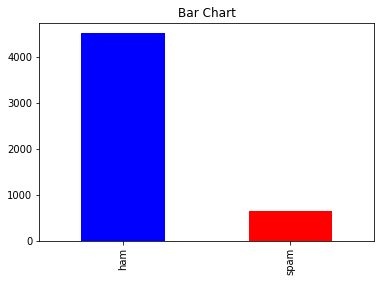

In [12]:
Count = pd.value_counts(data['Label'], sort=True)
Count.plot(kind='bar', color=['blue', 'red'])
plt.title('Bar Chart')
plt.show()

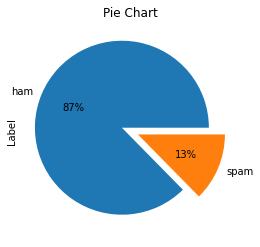

In [13]:
from pandas.plotting import autocorrelation_plot
Count.plot(kind='pie', autopct='%1.0f%%', explode=(0.1, 0.1))
plt.title('Pie Chart')
plt.show()

In [14]:
data_ham = data[data['Label'] == "ham"]
data_ham_count = data_ham['EmailText'].str.split().str.len()
data_ham_count.index = data_ham_count.index.astype(str) + ' words:'
data_ham_count.sort_index(inplace=True)

data_spam = data[data['Label'] == "spam"]
data_spam_count = data_spam['EmailText'].str.split().str.len()
data_spam_count.index = data_spam_count.index.astype(str) + ' words:'
data_spam_count.sort_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


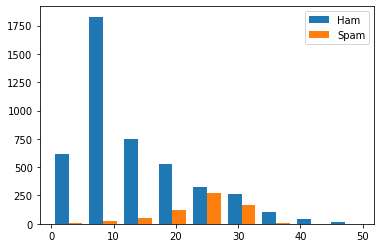

In [15]:
LS = np.linspace(0, 50, 10)
plt.hist([data_ham_count, data_spam_count], LS, label=['Ham', 'Spam'])
plt.legend(loc='upper right')
plt.show()

In [16]:
data.head()

,Label,EmailText,Label_Num,Email_Len
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


In [17]:
X = data['EmailText'].values
y = data['Label_Num'].values

**Splitting the data into training data & test data**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

**Feature Extraction**

In [19]:
cv = CountVectorizer()  
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

**Symmetric Data set**

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

**Training the Model**

In [21]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
print(classifier.score(X_test,y_test))

0.9777562862669246


In [22]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
print(classifier.score(X_train_res,y_train_res))

0.7445607270724318


**Model Tunning**

In [23]:
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

model = GridSearchCV(svm.SVC(), tuned_parameters)

model.fit(X_train_res,y_train_res)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9968561064087061


In [25]:
prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print('Accuracy on testing data : ', accuracy_on_test_data)

Accuracy on testing data :  0.9197292069632496


**Confusion Matrix**

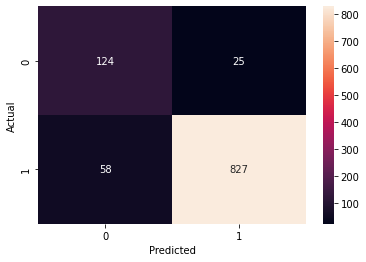

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction_on_test_data),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Classification Report**

In [27]:
print(classification_report(y_test,prediction_on_test_data))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       149
           1       0.97      0.93      0.95       885

    accuracy                           0.92      1034
   macro avg       0.83      0.88      0.85      1034
weighted avg       0.93      0.92      0.92      1034



**Makes Predictions**

In [28]:
input_mail = [
"Hey, you have won a car !!!!. Conrgratzz",
"Dear applicant, Your CV has been recieved. Best regards",
"You have received $1000000 to your account",
"Join with our whatsapp group",
"Kindly check the previous email. Kind Regards"]


input_data_features = cv.transform(input_mail)

prediction = model.predict(input_data_features)
print(prediction)


for i in prediction:
    if (i == 1):
      print('Ham mail')
    else:
      print('Spam mail')

[0 1 0 0 1]
Spam mail
Ham mail
Spam mail
Spam mail
Ham mail
